In [1]:
!pip install yfinance



In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
stock_symbol = 'BERGEPAINT.BO'

In [4]:
start='2023-04-25'

In [5]:
end='2024-04-25'

In [6]:
stock_data = yf.download(stock_symbol, start , end)

print(stock_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2023-04-25  494.041656  496.166656  489.041656  495.083344  492.360474   34095
2023-04-26  495.083344  505.166656  495.083344  503.916656  501.145203   78370
2023-04-27  503.958344  509.875000  499.583344  501.583344  498.824707   36733
2023-04-28  500.041656  510.041656  496.416656  508.083344  505.288971   16328
2023-05-02  506.708344  515.958313  506.708344  512.416687  509.598480   23270
...                ...         ...         ...         ...         ...     ...
2024-04-18  531.400024  536.150024  514.000000  515.900024  515.900024  107298
2024-04-19  515.549988  515.549988  501.000000  504.850006  504.850006   85908
2024-04-22  509.399994  516.299988  501.850006  506.600006  506.600006   54573
2024-04-23  512.000000  512.000000  502.049988  506.500000  506.500000   59113
2024-04-24  508.149994  510.250000  506.049988  507.

In [7]:




def monte_carlo_simulation(start_price, days, mu, sigma):
    dt = 1
    prices = np.zeros(days)
    prices[0] = start_price
    
    for day in range(1, days):
        drift = mu * dt
        shock = sigma * np.random.normal()
        price = prices[day - 1] *(1+drift + shock)
        prices[day] = price if price > 0 else 0
    
    return prices


start_price = stock_data['Close'].iloc[-1]


stock_data['Daily Return'] = stock_data['Close'].pct_change()


mu = stock_data['Daily Return'].mean()
sigma = stock_data['Daily Return'].std()

days = 265

simulations = 1000


simulated_prices = np.zeros((simulations, days))
for i in range(simulations):
    simulated_prices[i] = monte_carlo_simulation(start_price, days, mu, sigma)





# PLotting the simulated price

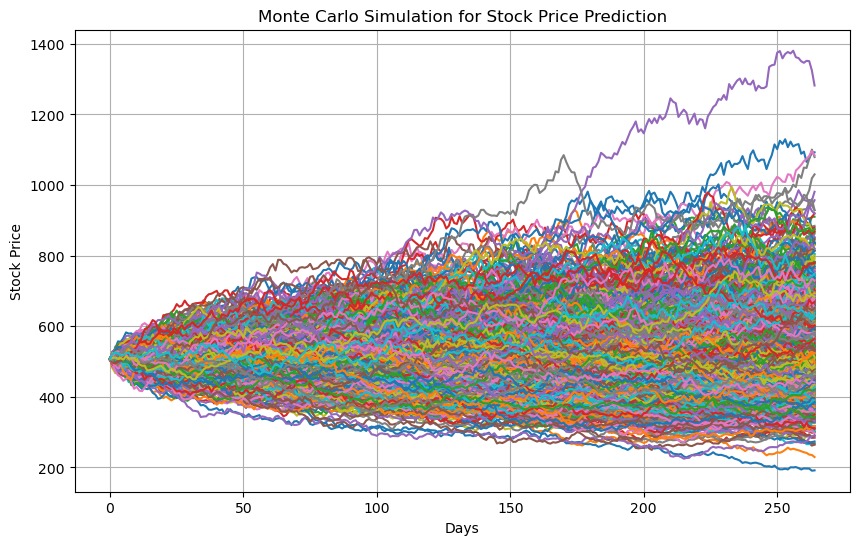

In [8]:
plt.figure(figsize=(10, 6))
for i in range(simulations):
    plt.plot(simulated_prices[i])

plt.title('Monte Carlo Simulation for Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()


## Simualted Values at various percentile over the 265 days

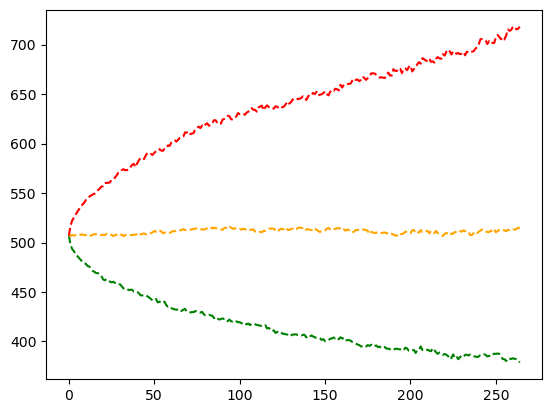

In [9]:
quantiles = np.percentile(simulated_prices, [10, 50, 90], axis=0)

plt.plot(quantiles[0], linestyle='--', color='green', label='10th Percentile')
plt.plot(quantiles[1], linestyle='--', color='orange', label='50th Percentile (Median)')
plt.plot(quantiles[2], linestyle='--', color='red', label='90th Percentile')


Text(0, 0.5, 'Stock Price')

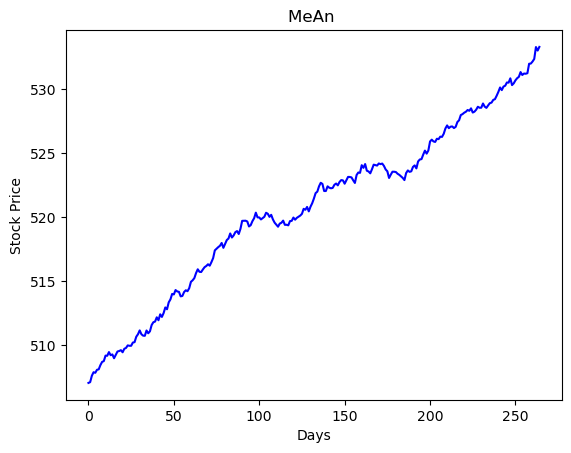

In [13]:
mean_prices = np.mean(simulated_prices, axis=0)
std_dev_prices = np.std(simulated_prices, axis=0)
plt.plot(mean_prices, label='Mean', color='blue')
plt.title('MeAn ')
plt.xlabel('Days')
plt.ylabel('Stock Price')

## Plot PDF (Probability Density Function)


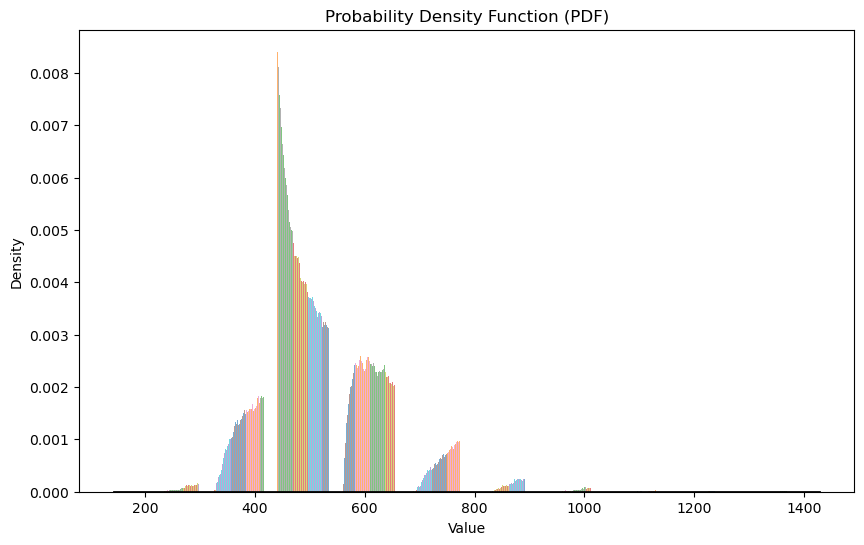

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(simulated_prices, bins=10, density=True, alpha=0.6)  
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')

plt.show()

## Simulated price at 95% confidence level

In [18]:

confidence_level = 0.95
stock_price_confidence = np.quantile(simulated_prices, confidence_level)
print("Stock price at 95% confidence level is :" ,stock_price_confidence)


Stock price at 95% confidence level is : 690.5606802409098
